# What are the most demanded skills for the top 3 most popular data roles?
* Methology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [2]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns
#loading dataset 
ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()
#converting job_posted_date to datetime format(data cleaning step)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else  x)

c:\Users\felix\anaconda3\envs\python_cource\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_usa=df[df['job_location']=='United States'].copy()
df_skills=df_usa.explode('job_skills')

In [4]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')

In [5]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
628,python,Data Scientist,3113
822,sql,Data Scientist,2164
655,r,Data Scientist,1882
870,tableau,Data Scientist,940
714,sas,Data Scientist,936
...,...,...,...
330,homebrew,Data Scientist,1
759,shell,Machine Learning Engineer,1
338,hugging face,Machine Learning Engineer,1
755,sheets,Senior Data Analyst,1


In [6]:
job_title=df_skills_count['job_title_short'].unique().tolist()
job_title=sorted(job_title[:3])
job_title

['Data Engineer', 'Data Scientist', 'Senior Data Scientist']

C:\Users\felix\AppData\Local\Temp\ipykernel_936\1888867935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot,y='job_skills',x='skill_count',ax=ax[i],palette='dark:b_r')
C:\Users\felix\AppData\Local\Temp\ipykernel_936\1888867935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot,y='job_skills',x='skill_count',ax=ax[i],palette='dark:b_r')
C:\Users\felix\AppData\Local\Temp\ipykernel_936\1888867935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot,y='job_skills',x='skill_count',ax=ax[i],palette='dark:b

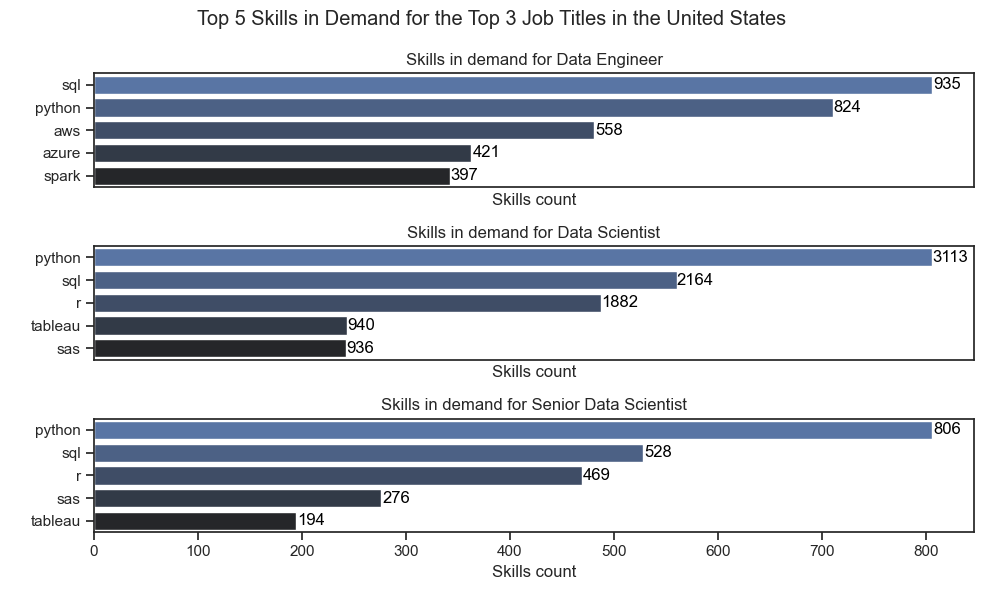

In [11]:
fig , ax= plt.subplots(3,1,figsize=(10,6))
sns.set_theme(style='ticks')
for i , job in enumerate(job_title):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job].head(5)
    #ax[i].barh(df_plot['job_skills'],df_plot['skill_count'])
    sns.barplot(data=df_plot,y='job_skills',x='skill_count',ax=ax[i],palette='dark:b_r')
    ax[i].set_title(f'Skills in demand for {job}')
    ax[i].set_xlabel('Skills count')
    ax[i].set_ylabel(' ')
    for n,v in enumerate(df_plot['skill_count']):
        ax[i].text(v+1,n,f'{v}',color='black',va='center')
    if i!=2:
        ax[i].set_xticks([])
plt.suptitle('Top 5 Skills in Demand for the Top 3 Job Titles in the United States')
plt.tight_layout()
plt.show()


In [8]:
df_job_title_count=df_usa['job_title_short'].value_counts().reset_index(name='job_count')

In [9]:
df_skill_per=pd.merge(df_skills_count,df_job_title_count,how="left",on='job_title_short')
df_skill_per['skill percentage']=df_skill_per['skill_count']/df_skill_per['job_count']*100
df_skill_per

,job_skills,job_title_short,skill_count,job_count,skill percentage
0,python,Data Scientist,3113,4319,72.076870
1,sql,Data Scientist,2164,4319,50.104191
2,r,Data Scientist,1882,4319,43.574902
3,tableau,Data Scientist,940,4319,21.764297
4,sas,Data Scientist,936,4319,21.671683
...,...,...,...,...,...
987,homebrew,Data Scientist,1,4319,0.023154
988,shell,Machine Learning Engineer,1,82,1.219512
989,hugging face,Machine Learning Engineer,1,82,1.219512
990,sheets,Senior Data Analyst,1,51,1.960784


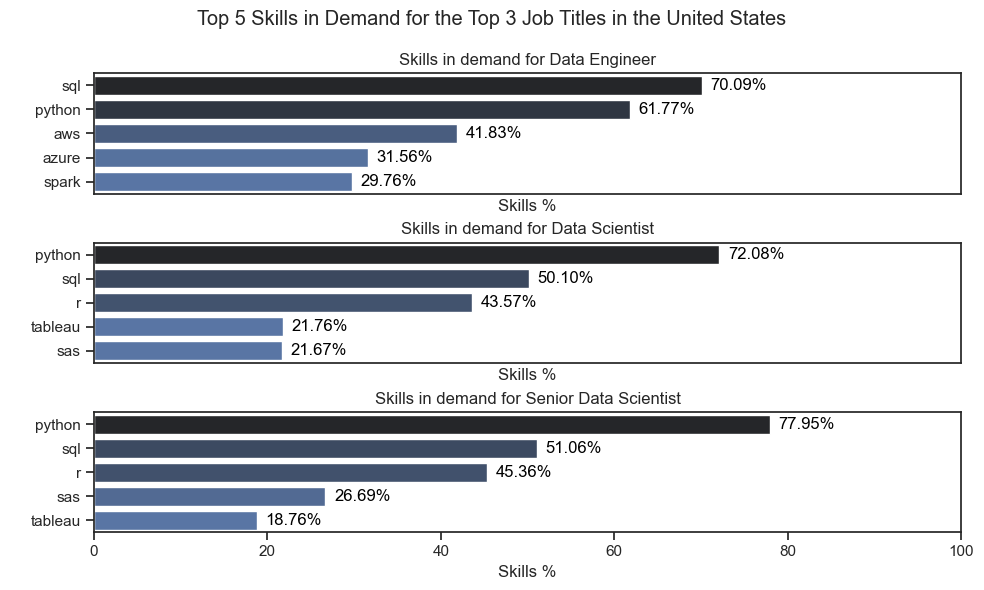

In [10]:
fig , ax= plt.subplots(3,1,figsize=(10,6))
sns.set_theme(style='ticks')
for i , job in enumerate(job_title):
    df_plot=df_skill_per[df_skill_per['job_title_short']==job].head(5)
    sns.barplot(data=df_plot,y='job_skills',x='skill percentage',ax=ax[i],hue='skill_count',palette='dark:b_r')
    #ax[i].barh(df_plot['job_skills'],df_plot['skill percentage'])
    ax[i].get_legend().remove()
    ax[i].set_title(f'Skills in demand for {job}')
    ax[i].set_xlabel('Skills %')
    ax[i].set_ylabel(' ')
    ax[i].set_xlim(0,100)
    for n,v in enumerate(df_plot['skill percentage']):
        ax[i].text(v+1,n,f'{v:.2f}%',color='black',va='center')
    if i!=2:
        ax[i].set_xticks([])
plt.suptitle('Top 5 Skills in Demand for the Top 3 Job Titles in the United States')
plt.tight_layout(h_pad=0.5)
plt.show()

